---
title: Predicting House Prices using Machine Learning
author: "Iván de Luna-Aldape"
date: "3/1/2025"
categories:
    - machine-learning
    - tutorial
draft: true
execute:
    freeze: true
---

### 1. Introduction
### Predicting House Prices using Machine Learning

In this project, we'll build a machine learning model to predict house prices based on features like square footage, number of bedrooms, location, and more. 

 We'll use the [Kaggle House Prices dataset](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) for this analysis.

### 2. Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### 3. Load and Explore the dataset
Let's take a look at the first few rows of the dataset to understand its structure. We'll also check for missing values and get a summary of the numerical features.

In [7]:
# Load the train.csv part of the dataset
data = pd.read_csv('./house-prices-data/train.csv')

# Display the first 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 4. Data Cleaning

Before building our model, we need to clean the data. This includes handling missing values and removing outliers. Here, we're filling missing values with the median of each column.

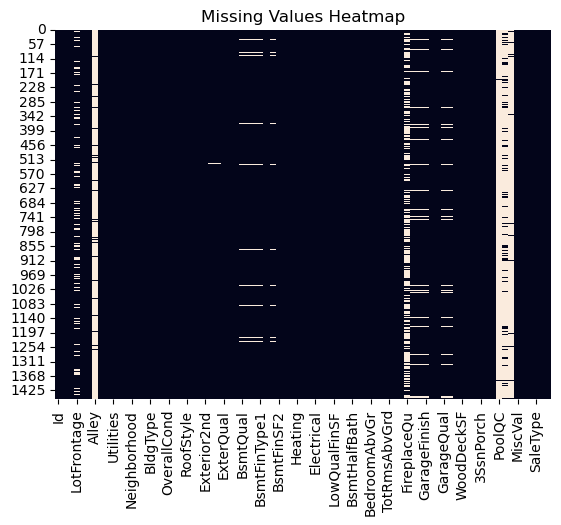

/var/folders/dp/hjbpmxsx7797vz0btvv75yh00000gn/T/ipykernel_21969/2750248851.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.median(), inplace=True)


In [8]:
# Check for missing values
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

# Fill missing values
data.fillna(data.median(), inplace=True)

### 5. Exploratory Data Analysis (EDA)

Let's visualize the relationships between features and the target variable. For example, we can see that larger houses tend to have higher prices.

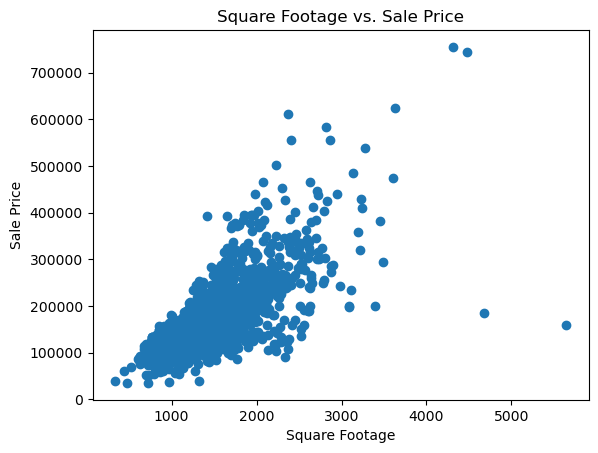

In [9]:
# Scatter plot of Square Footage vs. Price
plt.scatter(data['GrLivArea'], data['SalePrice'])
plt.xlabel('Square Footage')
plt.ylabel('Sale Price')
plt.title('Square Footage vs. Sale Price')
plt.show()

### 6. Feature Engineering

To improve our model's performance, we'll create new features and encode categorical variables. Here, we're using one-hot encoding for categorical data.

In [10]:
# One-hot encode categorical variables
data = pd.get_dummies(data, drop_first=True)

### 7. Model Building

We'll split the data into training and testing sets, train a Linear Regression model, and evaluate its performance using RMSE.

In [11]:
# Split the data
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 49204.92499243692


### 8. Results and Visualizations

### 9. Conclusion